In [68]:
from plotnine import *
import pandas as pd
import os

directory = "/Users/florianraths/Code/Arduino-Sketches/.vscode/log_serial"

In [69]:
# Function to extract the timestamp from the filename
def extract_timestamp(filename):
    # Assuming the timestamp format is "_YYYY_MM_DD.HH.MM.SS.MS.txt"
    parts = filename.rsplit('_', 1)
    if len(parts) == 2:
        timestamp_str = parts[1].rsplit('.', 1)[0]
        return timestamp_str

In [70]:
# Get a list of all files in the directory
files = os.listdir(directory)

# Filter files that have the expected timestamp format
timestamped_files = [filename for filename in files if extract_timestamp(filename) is not None]

# Sort the timestamped files based on their timestamps (newest first)
timestamped_files.sort(key=lambda x: extract_timestamp(x), reverse=True)

# Get the newest file
newest_file = timestamped_files[0]

# Print the name of the newest file
print(f"The newest file is: {newest_file}")

The newest file is: devttyusbmodem1401_2023_10_29.12.27.13.522.txt


In [71]:
df = pd.read_csv(directory + '/' + newest_file)
headers = [i for i in range(1, len(df.columns) + 1)]
df.columns = headers
df = df.iloc[:, :-1]
df = df.reset_index()
df = df.melt(id_vars = 'index')
df


,index,variable,value
0,0,1,7
1,1,1,2
2,2,1,2
3,3,1,10
4,4,1,17
...,...,...,...
6729,513,13,31
6730,514,13,32
6731,515,13,32
6732,516,13,34


In [72]:
print(df['value'].min())
print(df['value'].max())
print(df['value'].mean())

0
245
101.2944757944758


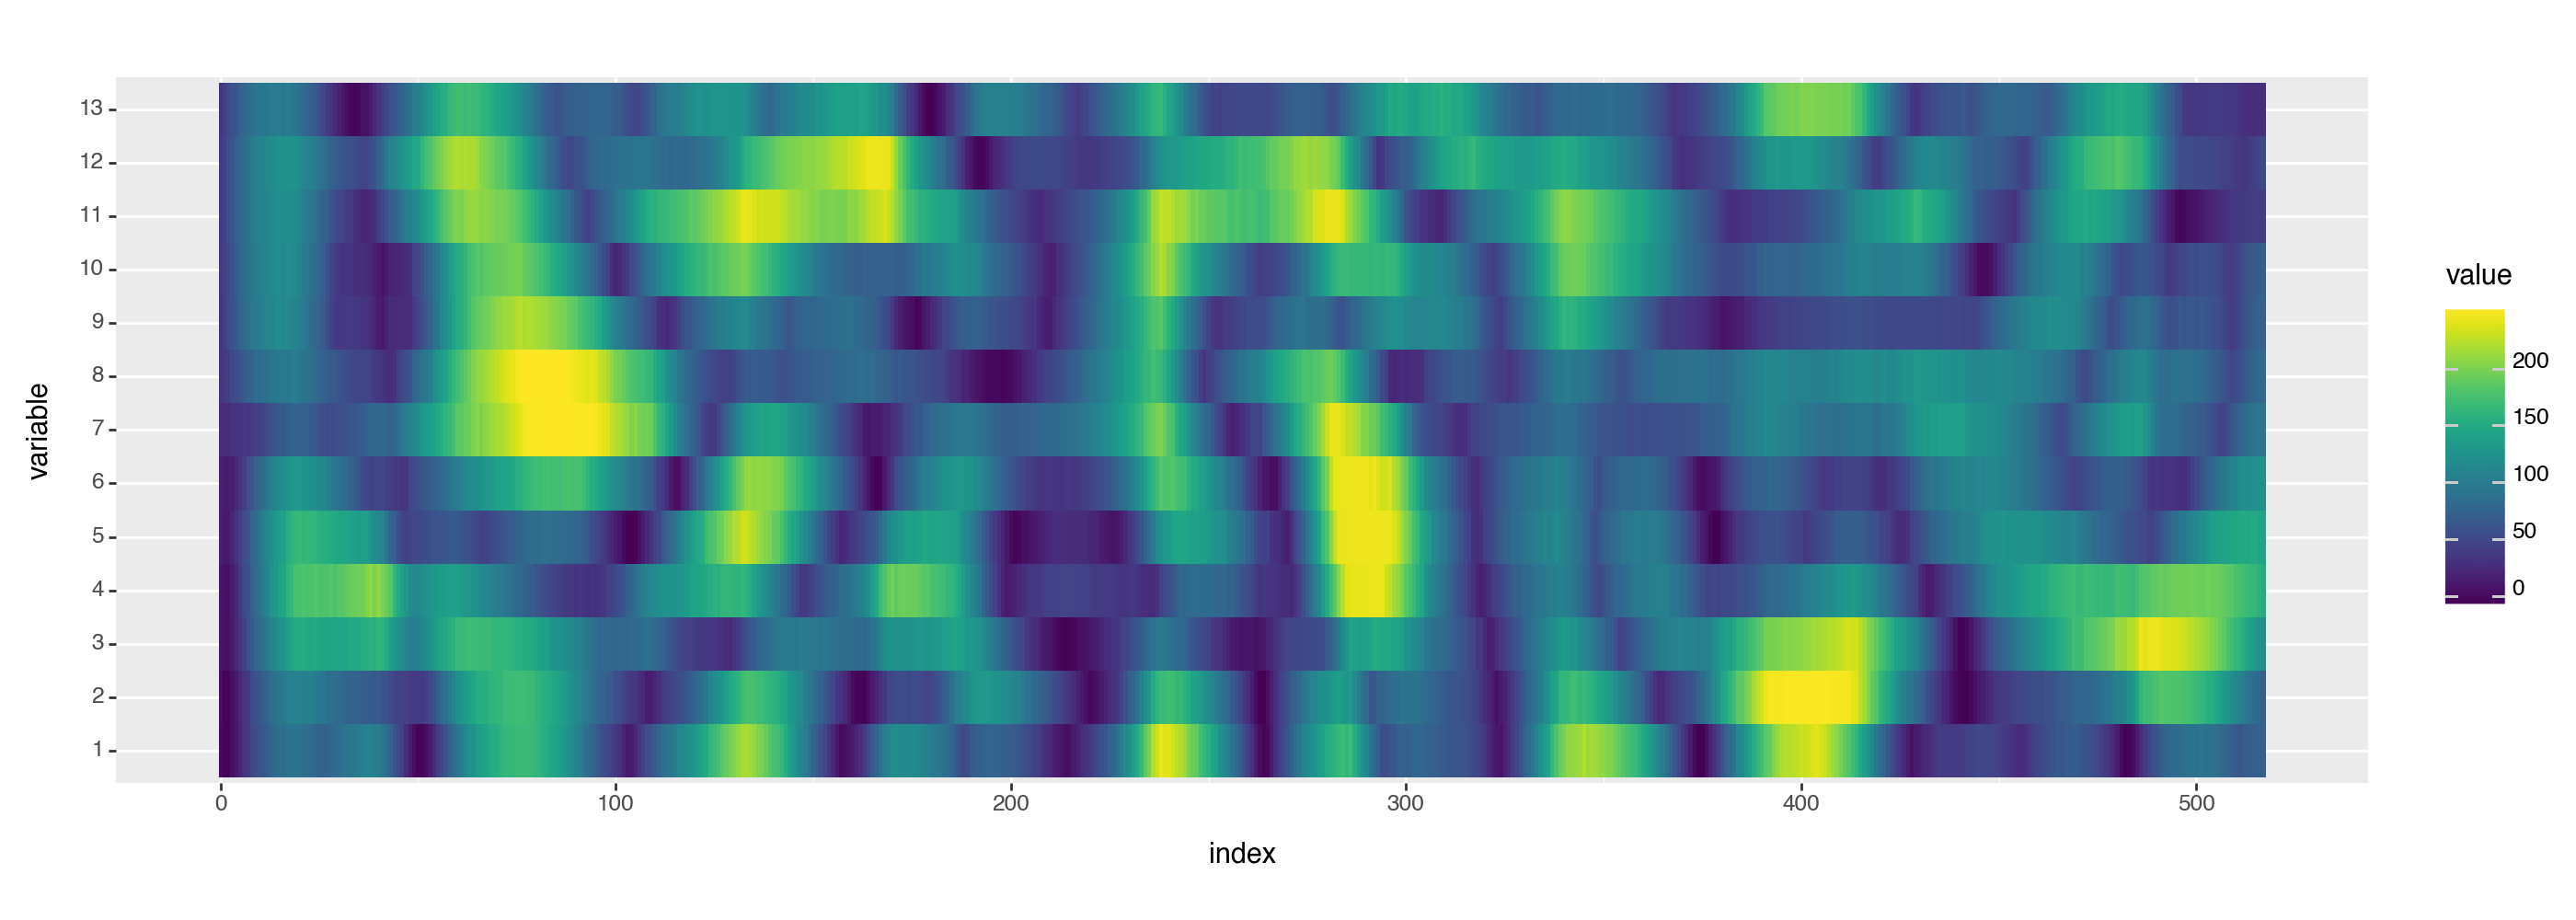

<Figure Size: (1400 x 500)>

In [73]:
(ggplot(df, 
aes(x = 'index', y = 'variable', fill = 'value')) +
geom_tile() + theme(figure_size = [14, 5])
)

In [74]:
df

,index,variable,value
0,0,1,7
1,1,1,2
2,2,1,2
3,3,1,10
4,4,1,17
...,...,...,...
6729,513,13,31
6730,514,13,32
6731,515,13,32
6732,516,13,34


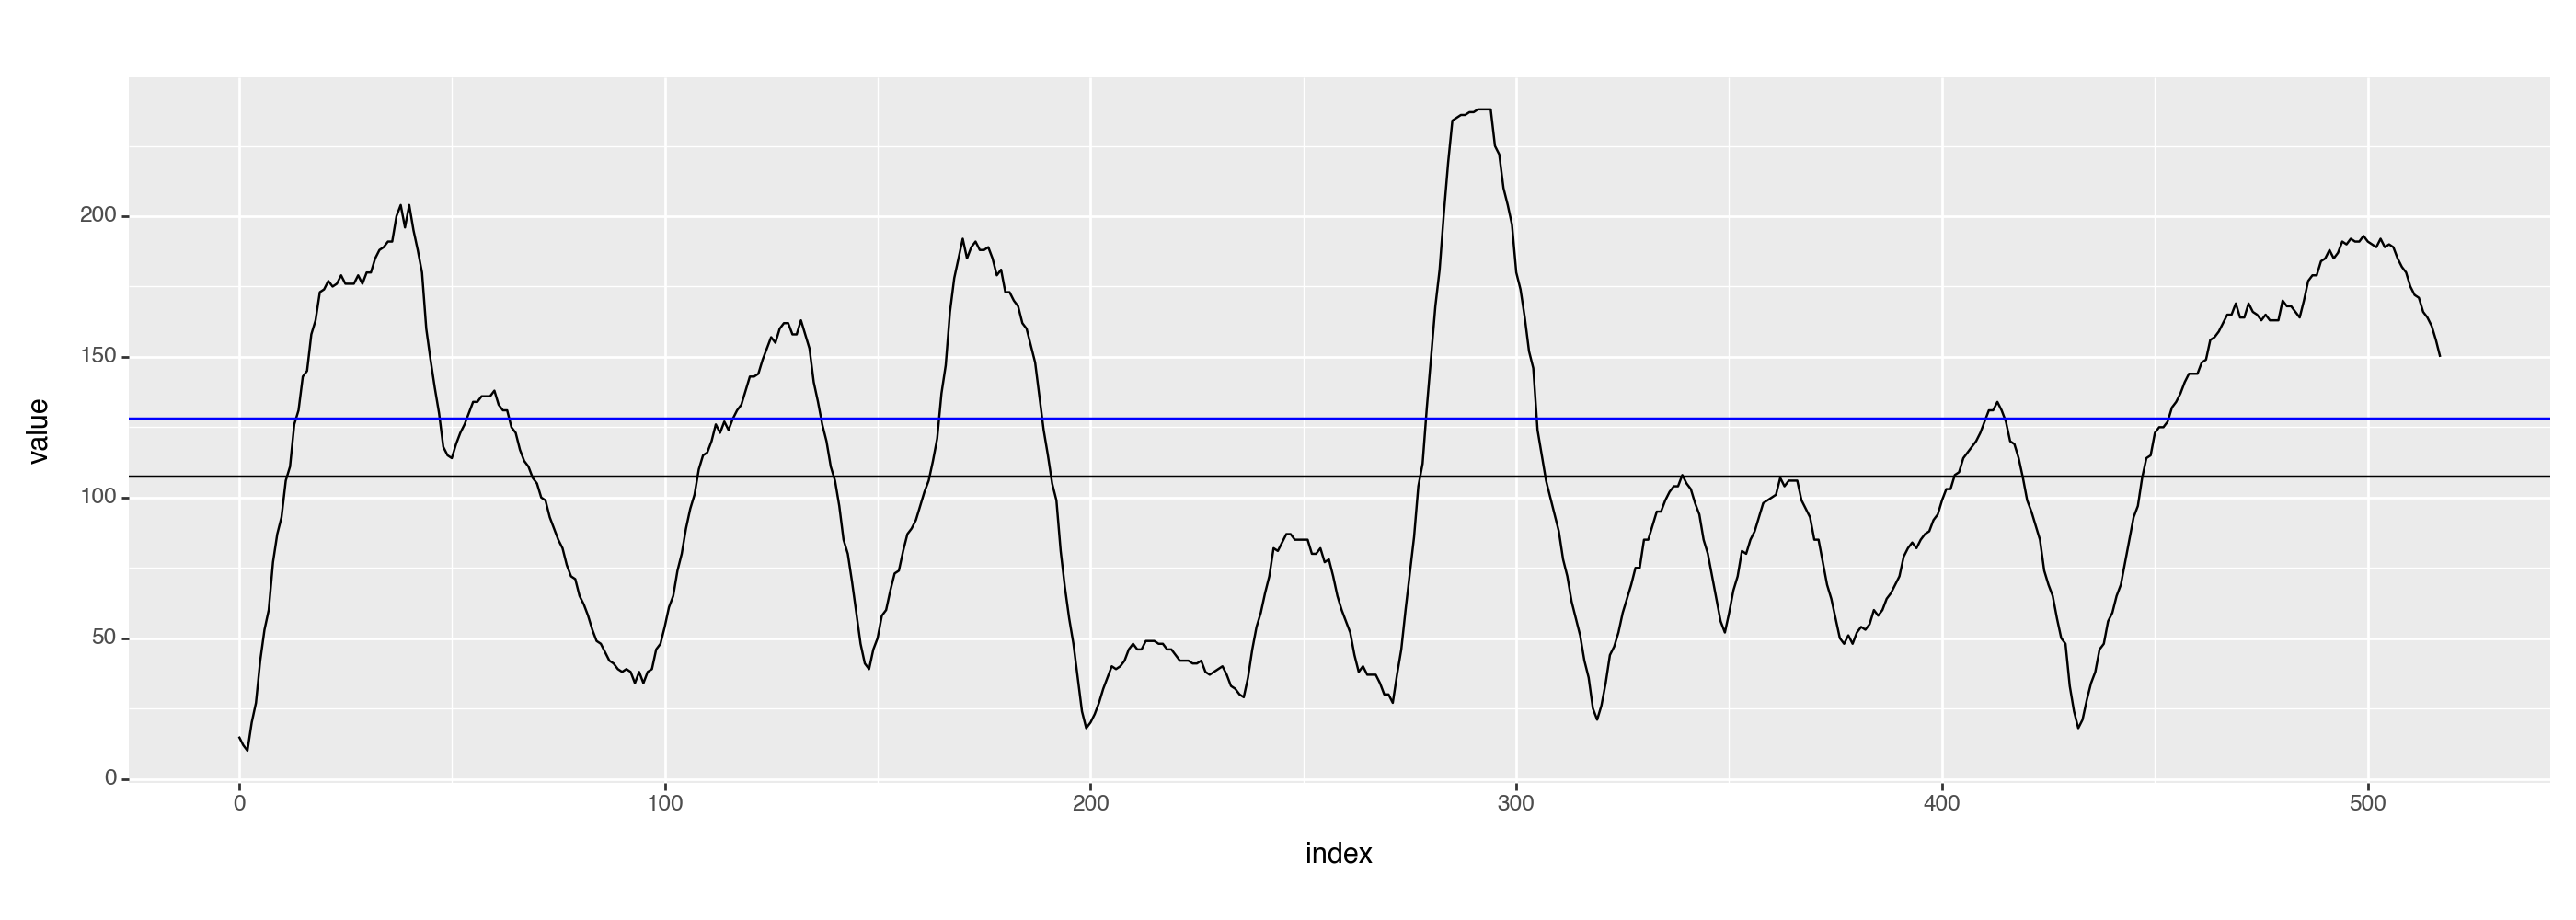

<Figure Size: (1400 x 500)>

In [75]:
line = df[df['variable'] == 4]

(ggplot(line, 
aes(x = 'index', y = 'value')) +
geom_line() +
geom_hline(yintercept = line['value'].mean()) +
geom_hline(yintercept = 128, color = 'Blue') +
#facet_wrap('variable') +
#geom_smooth(method = 'loess', span = 0.1) + 
theme(figure_size = [14, 5])
)